In [53]:
from __future__ import division
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import matplotlib;matplotlib.rcParams['font.family'] = 'serif'

NUM_BINS = 10
VAR = 0.01 # takes value from (0, 0.25)
N = 10000

In [54]:
# Load prediction from ResNet on CIFAR100 test data, which contains 10,000 images. 
# https://github.com/rloganiv/pytorch-classification/blob/master/predict.py
# data: a numpy array of size 10,000 * 101. For each row, the first entry is the true label,
#       following by softmax of output logits of this image for each class.
data = np.genfromtxt("../data/cifar100_predictions.txt")[0:N,:]# 10000*101

In [55]:
probabilities = data[:,1:]
confidence = np.max(probabilities, axis=1)
Y_predict = np.argmax(probabilities, axis=1)
Y_true = data[:,0]

bins = np.linspace(0, 1, NUM_BINS+1)
digitized = np.digitize(confidence, bins)-1

print(confidence.mean())
print (Y_predict == Y_true).mean()

0.756816223491
0.6571


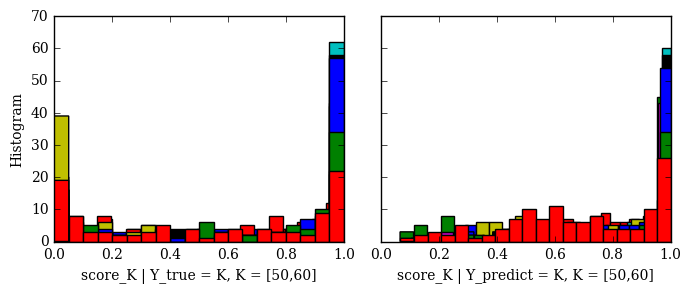

In [58]:
f, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7,3))
for K in range(50,60):
    ax[0].hist(probabilities[Y_true == K,K], bins=20)
for K in range(50,60):
    ax[1].hist(probabilities[Y_predict == K,K], bins=20)
ax[0].set_xlabel("score_K | Y_true = K, K = [50,60]")
ax[1].set_xlabel("score_K | Y_predict = K, K = [50,60]")
ax[0].set_ylabel("Histogram")
f.tight_layout()
plt.show()

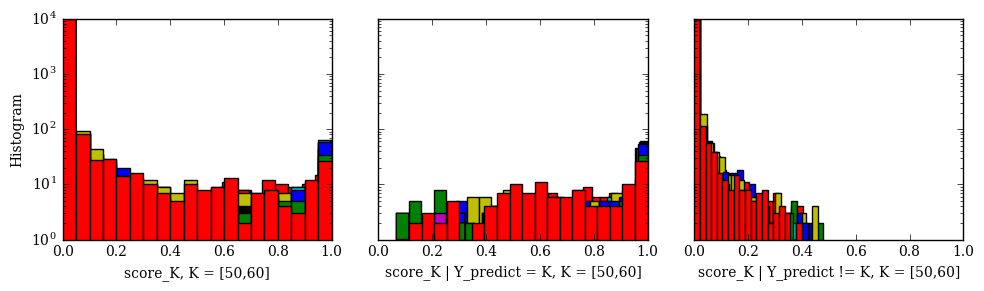

In [70]:
f, ax = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(10,3))
for K in range(50,60):
    ax[0].hist(probabilities[:,K], bins=20)
for K in range(50,60):
    ax[1].hist(probabilities[Y_predict == K,K], bins=20)
for K in range(50,60):
    ax[2].hist(probabilities[Y_predict != K,K], bins=20)
ax[0].set_yscale('log')
ax[0].set_xlabel("score_K, K = [50,60]")
ax[1].set_xlabel("score_K | Y_predict = K, K = [50,60]")
ax[2].set_xlabel("score_K | Y_predict != K, K = [50,60]")
ax[0].set_ylabel("Histogram")
f.tight_layout()
plt.show()

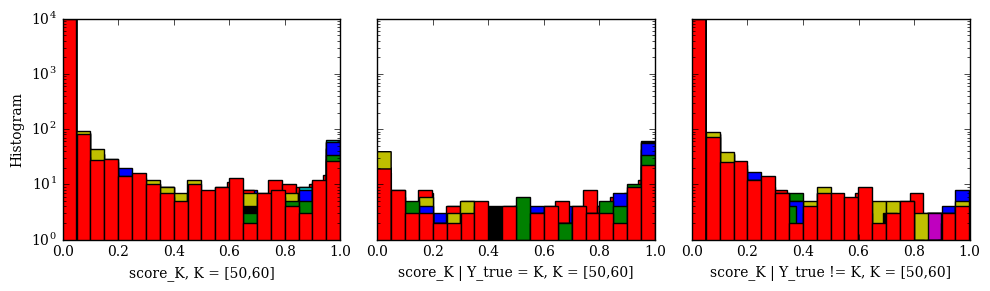

In [71]:
f, ax = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(10,3))
for K in range(50,60):
    ax[0].hist(probabilities[:,K], bins=20)
for K in range(50,60):
    ax[1].hist(probabilities[Y_true == K,K], bins=20)
for K in range(50,60):
    ax[2].hist(probabilities[Y_true != K,K], bins=20)
ax[0].set_yscale('log')
ax[0].set_xlabel("score_K, K = [50,60]")
ax[1].set_xlabel("score_K | Y_true = K, K = [50,60]")
ax[2].set_xlabel("score_K | Y_true != K, K = [50,60]")
ax[0].set_ylabel("Histogram")
f.tight_layout()
plt.show()